## Configuration de jet de sortie de tuyère

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from aerokit.aero import Isentropic as Is
from aerokit.aero import degree     as deg  # import trigo functions with degree unit support
from aerokit.aero import ShockWave  as sw   # import functions for shockwave computation
from aerokit.aero import Supersonic as sup  # import functions for steady supersonic flows
from aerokit.aero import MassFlow as mf
from aerokit.aero.plot.defaultstyle import *
%matplotlib inline

### Fonctions

In [2]:
def init_fig():
         
    plt.rcParams["figure.figsize"]=[16,9]
    fig, axes = plt.subplots(1, facecolor='white')
    axes.set(aspect="equal")
    axes.axis('off')
    
    return fig

In [3]:
def init_config(AsAcol,PtPs):
    
    M0=mf.MachSup_Sigma(AsAcol)
    PtPsonique= Is.PtPs_Mach(mf.MachSub_Sigma(AsAcol))
    PtPadapt= Is.PtPs_Mach(M0)
    PtPnormalshock= PtPadapt/sw.Ps_ratio(M0)
    PsP0= PtPadapt/PtPs
    
    return M0, PtPsonique, PtPadapt, PtPnormalshock, PsP0

In [4]:
def plot_figure(AsAcol,PtPs):
    
    A_col= (1/AsAcol)*10
    paroi_x= np.array([-30,-25,-25,0])
    paroi_y= np.array([5,A_col/2,A_col/2,5])

    plt.plot(paroi_x, paroi_y, zorder=101, **sty_wall)
    plt.plot(paroi_x, -paroi_y, zorder=101, **sty_wall)
    
    config_plot(AsAcol,PtPs)
    
    plt.tight_layout()

In [5]:
def config_plot(AsAcol,PtPs):
    
    M0, PtPsonique, PtPadapt, PtPnormalshock, PsP0= init_config(AsAcol,PtPs)
    
    if PtPs<=PtPsonique:
        title="régime subsonique"
        plot_fluide()
        
    elif PtPs>PtPsonique and PtPs<PtPnormalshock-0.05:
        title="choc droit dans le divergent"
        plot_fluide()
        
    elif PtPs>PtPnormalshock-0.05 and PtPs<=PtPnormalshock+0.05:
        title="choc droit en sortie de tuyère"
        plot_normal_shock()
        
    elif PtPs>PtPnormalshock+0.05 and PtPs<PtPadapt-0.05:
        title="choc oblique en sortie de tuyère"
        plot_oblique_shock(*oblique_shock(M0,PsP0))
        
    elif PtPs>PtPadapt-0.05 and PtPs<PtPadapt+0.05:
        title="régime supersonique adapté"
        plot_fluide()
        
    elif PtPs>PtPadapt+0.05:
        title="détente en sortie de tuyère"
        plot_exp(*expansion(M0,PtPs))
        
    plt.text(-17, 5.5, title, fontsize='large')

In [6]:
def plot_fluide():
    
        longueur_fluide=5
        plt.plot([0,longueur_fluide], [5,5], color="blue")
        plt.plot([0,longueur_fluide], [-5,-5], color="blue")

In [7]:
def plot_normal_shock():
    
    longueur_fluide=5
    
    plt.plot([0,longueur_fluide], [5,5], color="blue")
    plt.plot([0,longueur_fluide], [-5,-5], color="blue")
    
    plt.plot([0,0],[5,-5], color="red")

In [8]:
def oblique_shock(M0, PsP0):
    
    Mn0= sw.Mn_Ps_ratio(PsP0)
    sigma= deg.asin(Mn0/M0)
    dev = abs(sw.deflection_Mach_sigma(M0, sigma))
    
    return dev, sigma

In [9]:
def plot_oblique_shock(dev, sigma):

    longueur_fluide=5
    longueur_choc=9
    
    plt.plot([0,longueur_fluide*deg.cos(-dev)],[5,5+longueur_fluide*deg.sin(-dev)], color="blue")
    plt.plot([0,longueur_choc*deg.cos(-sigma)],[5,5+longueur_choc*deg.sin(-sigma)], color="red")
    
    plt.plot([0,longueur_fluide*deg.cos(dev)],[-5,-5+longueur_fluide*deg.sin(dev)], color="blue")
    plt.plot([0,longueur_choc*deg.cos(sigma)],[-5,-5+longueur_choc*deg.sin(sigma)], color="red")

In [10]:
def expansion(M0, PtPs):
    
    om0= sup.PrandtlMeyer_Mach(M0)
    M1= Is.Mach_PtPs(PtPs)
    om1= sup.PrandtlMeyer_Mach(M1)
    
    mu0 = deg.asin(1./M0)
    mu1 = deg.asin(1./M1)
    dev= abs(om1-om0)
    
    return dev, mu0, mu1

In [11]:
def plot_exp(dev, mu0, mu1):
    
    longueur_fluide=5
    longueur_detente=9
    
    plt.plot([0,longueur_fluide*deg.cos(dev)],[5,5+longueur_fluide*deg.sin(dev)], color="blue")
    plt.fill([0,longueur_detente*deg.cos(-mu0),longueur_detente*deg.cos(-(mu1-dev))],
             [5,5+longueur_detente*deg.sin(-mu0),5+longueur_detente*deg.sin(-(mu1-dev))],
             facecolor=sty_carac['color'], alpha=.3)
    
    plt.plot([0,longueur_fluide*deg.cos(-dev)],[-5,-5+longueur_fluide*deg.sin(-dev)], color="blue")
    plt.fill([0,longueur_detente*deg.cos(mu0),longueur_detente*deg.cos(mu1-dev)],
             [-5,-5+longueur_detente*deg.sin(mu0),-5+longueur_detente*deg.sin(mu1-dev)],
             facecolor=sty_carac['color'], alpha=.3)

In [12]:
def print_details(AsAcol, PtPs):
    
    M0, PtPsonique, PtPadapt, PtPnormalshock, PsP0= init_config(AsAcol,PtPs)
    
    print("Avec ce réglage de col:\nPt/PSonique={}, Pt/Pnormalshock={}, PtPadapt={}\n".format(PtPsonique, PtPnormalshock, PtPadapt))
    
    if PtPs>PtPnormalshock-0.05 and PtPs<=PtPnormalshock+0.05:
        M1  = sw.downstream_Mn(M0)
        p1p0= sw.Ps_ratio(M0)
        label="choc droit (Pt/Ps={})".format(PtPs)
        
        print("{}\n  M0   M1   p1/po \n{:.3f} {:.3f} {:.2f}".format(label,M0,M1,p1p0))
    
    elif PtPs>PtPnormalshock+0.05 and PtPs<PtPadapt-0.05:

        Mn0= sw.Mn_Ps_ratio(PsP0)
        sig0= deg.asin(Mn0/M0)
        dev = abs(sw.deflection_Mach_sigma(M0, sig0))
        p1p0 = sw.Ps_ratio(Mn0)
        pt1pt0 = sw.Pi_ratio(Mn0)
        Mn1  = sw.downstream_Mn(Mn0)
        M1   = Mn1/deg.sin(sig0-dev)
        label="choc oblique (Pt/Ps={})".format(PtPs)
        
        print("{}\n  M0  dev  sigma Mn0  p1/p0 pt1/pt0 Mn1  M1  devmax\n{:.3f} {:.2f} {:.2f} {:.3f} {:.2f} {:.3f} {:.3f} {:.3f} {:.2f}"
         .format(label,M0,dev,sig0,Mn0,p1p0,pt1pt0,Mn1,M1,sw.dev_Max(M0)))
    
    elif PtPs>PtPadapt+0.05:
        
        om0= sup.PrandtlMeyer_Mach(M0)
        M1= Is.Mach_PtPs(PtPs)
        om1= sup.PrandtlMeyer_Mach(M1)
        p1p0 = Is.PiPs_Mach(M1)/Is.PiPs_Mach(M0)
        dev= abs(om1-om0)
        label="détente (Pt/Ps={})".format(PtPs)
        
        print("{}\n  M0  om0   dev   om1    M1   p1/p0 pt1/pt0 \n{:.3f} {:.2f} {:.2f} {:.3f} {:.2f} {:.3f} {:.3f}"
         .format(label,M0,om0,dev,om1,M1, p1p0, 1.))

### Paramètres

In [13]:
#Vous pouvez jouer sur les rapports As/Acol et Pt/Ps. La figure modifie l'ouverture du col.
#Pour information, données du BE:  Pt=101325 Pa, Acol_fermé=0.092, Acol_ouvert= 0.126, As=0.13, Ps variable

As= 0.15
Acol= 0.092
AsAcol= As/Acol

Pt= 101325 
Ps= 15000
PtPs= Pt/Ps

### Figure

Avec ce réglage de col:
Pt/PSonique=1.109388082257548, Pt/Pnormalshock=1.7026082806549718, PtPadapt=7.334426969380821

choc oblique (Pt/Ps=6.755)
  M0  dev  sigma Mn0  p1/p0 pt1/pt0 Mn1  M1  devmax
1.958 1.49 31.94 1.036 1.09 1.000 0.966 1.905 22.24


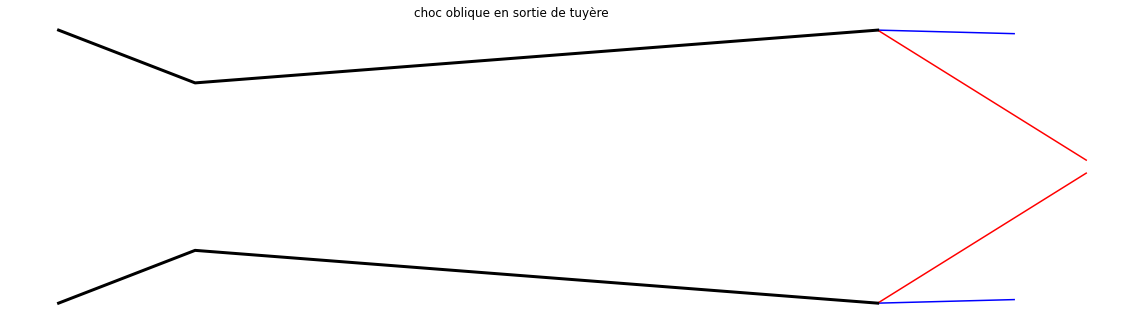

In [14]:
init_fig();
plot_figure(AsAcol,PtPs);
print_details(AsAcol,PtPs)

### Animation

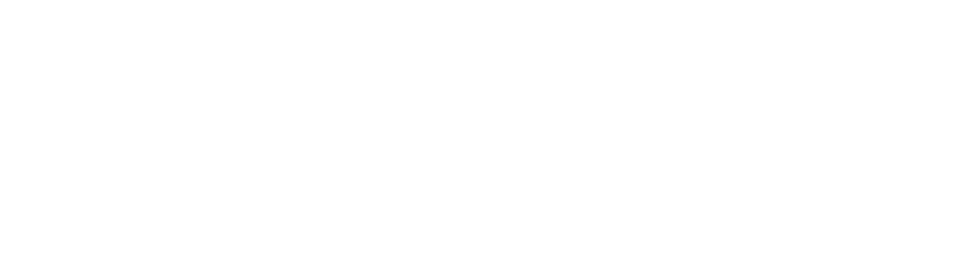

In [16]:
#Vous pouvez observer l'évolution de la configuration de jet de sortie de tuyère en fonction de As/Acol ou Pt/Ps
from celluloid import Camera as cam
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi']  = 60
plt.rcParams['savefig.dpi'] = 60

camera =cam(init_fig())

for PtPs in np.linspace(1.5, 8, 100):
    plot_figure(AsAcol,PtPs)
    camera.snap()

camera.animate()